# 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피쳐 : Length, Height, Width
- 타겟 : Weight
- 조건
    - 특성 추가 => degree = 5
    - 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("../data/perch3.csv")
df.head(5)

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415


In [30]:
featureDF = df.drop("Weight", axis=True)
targetSR = df["Weight"]

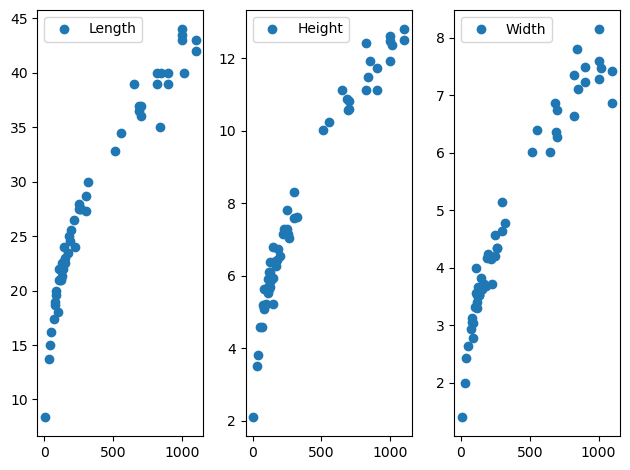

In [32]:
################### Feature & Target 관계

for nIdx in range(1, 4):
    col_name = featureDF.columns[nIdx-1]
    plt.subplot(1, 3, nIdx)
    plt.plot(targetSR, featureDF[col_name], "o", label=col_name)
    plt.legend()
plt.tight_layout()
plt.show()

# 직선의 형태는 아니지만 곡선의 양의 방 향/비례하는 관계

## 3. 데이터 가공 
- 특성 추가
- 특성 스케일링

### 3-1 특성 추가

In [43]:
from sklearn.preprocessing import PolynomialFeatures # 전처리

poly_pro = PolynomialFeatures(degree=5, include_bias=False) # b값(상수항) 제외하고 싶을 때

In [44]:
poly_feature = poly_pro.fit_transform(featureDF)

In [45]:
poly_feature.shape # 특성 추가 후

(56, 55)

In [46]:
poly_pro.get_feature_names_out()

array(['Length', 'Height', 'Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2', 'Length^3',
       'Length^2 Height', 'Length^2 Width', 'Length Height^2',
       'Length Height Width', 'Length Width^2', 'Height^3',
       'Height^2 Width', 'Height Width^2', 'Width^3', 'Length^4',
       'Length^3 Height', 'Length^3 Width', 'Length^2 Height^2',
       'Length^2 Height Width', 'Length^2 Width^2', 'Length Height^3',
       'Length Height^2 Width', 'Length Height Width^2', 'Length Width^3',
       'Height^4', 'Height^3 Width', 'Height^2 Width^2', 'Height Width^3',
       'Width^4', 'Length^5', 'Length^4 Height', 'Length^4 Width',
       'Length^3 Height^2', 'Length^3 Height Width', 'Length^3 Width^2',
       'Length^2 Height^3', 'Length^2 Height^2 Width',
       'Length^2 Height Width^2', 'Length^2 Width^3', 'Length Height^4',
       'Length Height^3 Width', 'Length Height^2 Width^2',
       'Length Height Width^3', 'Length Width^4', 'Height^5

### 피쳐 스케일링
- 훈련용 테스트용 분리

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_feature, targetSR, random_state=5)

In [53]:
print(f"Feature => {X_train.shape}, {y_train.shape} Test => {X_test.shape}, {y_test.shape}")

Feature => (42, 55), (42,) Test => (14, 55), (14,)


- 스케일링 진행

In [60]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [61]:
scaled_X_train = std_scaler.transform(X_train)
scaled_X_test = std_scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [68]:
train_score = lr_model.score(scaled_X_train, y_train)
test_score = lr_model.score(scaled_X_test, y_test)
print(f"TRAIN => {train_score} TEST SCORE => {test_score}")

TRAIN => 1.0 TEST SCORE => -38.767868061603046


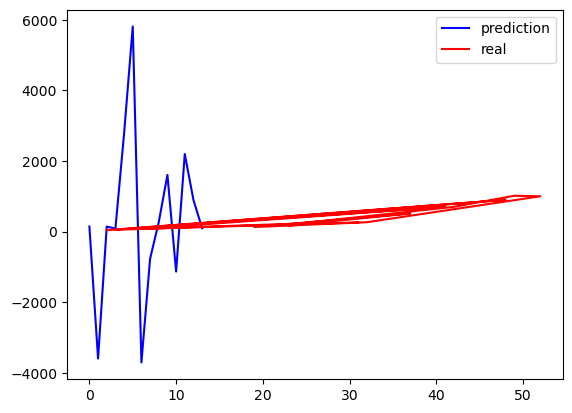

In [67]:
y_pred = lr_model.predict(scaled_X_test)

plt.plot(y_pred, "b-", label = "prediction")
plt.plot(y_test, "r-", label = "real")
plt.legend()
plt.show()

# <hr>규제 : 가중치 값을 조절해서 과대적합 문제 해결
- Ridge : 모든 피쳐의 가중치를 0에 가깝게 조절 
- Lasso : 특정 피쳐의 가중치를 0으로해서 차원 축소의 의미를 부여 

## [규제 1] Ridge

In [69]:
from sklearn.linear_model import Ridge

In [70]:
ridge_model = Ridge(max_iter=100)

ridge_model.fit(scaled_X_train, y_train)

Ridge()

In [71]:
train_score = ridge_model.score(scaled_X_train, y_train)
test_score = ridge_model.score(scaled_X_test, y_test)
print(f"TRAIN => {train_score} TEST SCORE => {test_score}")

TRAIN => 0.9874355208005008 TEST SCORE => 0.9914491207423642


In [75]:
# 모델 파라미터
print(ridge_model.n_iter_)
print()
print(ridge_model.coef_) 
print()
print(ridge_model.intercept_)

None

[ 1.83176874e+00 -7.23677789e+00  1.03067055e+01  1.57775249e+01
  1.18446480e+01  1.67466597e+01  9.57952490e+00  1.47797173e+01
  2.48615142e+01  1.85163425e+01  1.67577526e+01  1.46142404e+01
  1.58382863e+01  1.38108100e+01  1.64490445e+01  1.56379186e+01
  1.39352928e+01  1.71480760e+01  2.50779150e+01  1.42694832e+01
  1.39921892e+01  6.23690826e+00  1.41806030e+01  6.32646330e+00
  2.93976268e+00  1.47629117e+01  7.00986521e+00  3.97399179e+00
  5.70584401e+00  1.56796396e+01  8.23737024e+00  5.75159002e+00
  8.24469917e+00  1.54675618e+01  5.86439125e+00  6.81074624e+00
 -5.88111799e+00  8.02129126e+00 -4.97701429e+00 -1.36851639e+01
  9.44134707e+00 -3.67900627e+00 -1.22792895e+01 -1.61590708e+01
  1.10232306e+01 -2.01766706e+00 -1.03096090e+01 -1.36546600e+01
 -1.21067571e+01  1.27255386e+01 -1.99919223e-02 -7.79070771e+00
 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01]

365.6404761904762


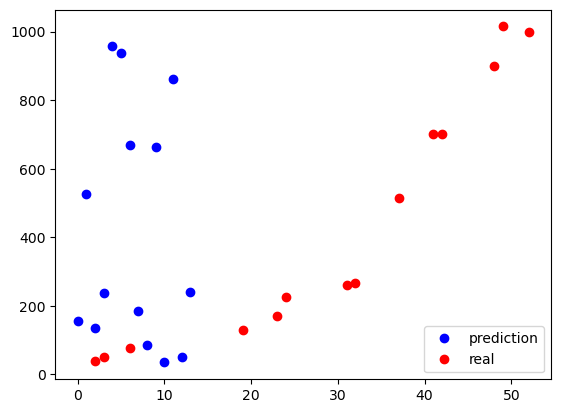

In [80]:
y_pred = ridge_model.predict(scaled_X_test)

plt.plot(y_pred, "bo", label = "prediction")
plt.plot(y_test, "ro", label = "real")
plt.legend()
plt.show()

In [89]:
# => 최적의 규제 강도 설정 값 찾기
# alpha값에 따른 train점수와 test점수 default = 1

alphas = [0.1, 1.0, 10., 20., 30.]
ridge_score = [[], []]

for a in alphas:
    ridge_model = Ridge(alpha = a)
    ridge_model.fit(scaled_X_train, y_train)
    train_score = ridge_model.score(scaled_X_train, y_train)
    test_score = ridge_model.score(scaled_X_test, y_test)

    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)

# 테스트 점수가 가장 높은 알파를 구하기 
best_alpha=alphas[ridge_score[1].index((max(ridge_score[1])))]

In [90]:
best_alpha

1.0

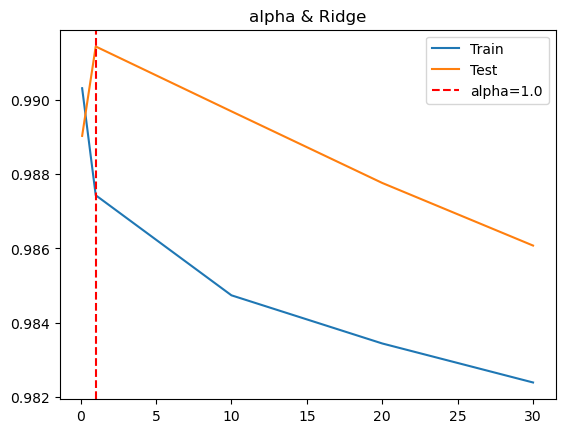

In [95]:
# 학습 및 테스트 점수 기반 시각화

plt.plot(alphas, ridge_score[0], label="Train")
plt.plot(alphas, ridge_score[1], label="Test")
plt.axvline(best_alpha, linestyle='--', color = "red", label=f"alpha={best_alpha}")
plt.legend()
plt.title("alpha & Ridge")
plt.show()

## [규제 2] Lasso

In [96]:
from sklearn.linear_model import Lasso

In [98]:
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [99]:
train_score = lasso_model.score(scaled_X_train, y_train)
test_score = lasso_model.score(scaled_X_test, y_test)
print(f"TRAIN => {train_score} TEST SCORE => {test_score}")

TRAIN => 0.9865761752892273 TEST SCORE => 0.9912639062921962


In [101]:
# 모델 파라미터
print(lasso_model.n_iter_)
print()
print(lasso_model.coef_) 
print()
print(lasso_model.intercept_)

1000

[ 0.          0.          0.          8.39678696  0.          0.
 13.70952971  0.         87.23199451 91.06954235 16.61716411  0.
 35.69479723  0.          0.         46.93195311  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         41.8984421
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.        ]

365.6404761904762


> Ridge는 0에 __가까운__ 값은 있어도 0은 없었지만  
> Lasso는 냅다 0

In [106]:
# => 최적의 규제 강도 설정 값 찾기
# alpha값에 따른 train점수와 test점수 default = 1

alphas = [0.1, 1.0, 10., 20., 30.]
lasso_score = [[], []]

for a in alphas:
    lasso_model = Lasso(alpha = a, max_iter=10000)
    lasso_model.fit(scaled_X_train, y_train)
    train_score = lasso_model.score(scaled_X_train, y_train)
    test_score = lasso_model.score(scaled_X_test, y_test)

    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)

# 테스트 점수가 가장 높은 알파를 구하기 
best_alpha=alphas[lasso_score[1].index((max(lasso_score[1])))]
best_alpha

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.908e+02, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


1.0

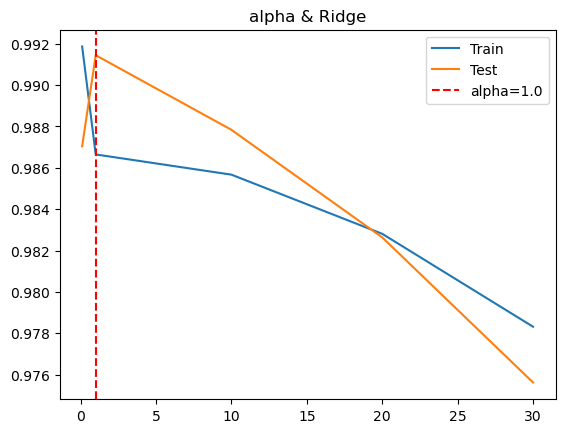

In [107]:
# 학습 및 테스트 점수 기반 시각화

plt.plot(alphas, lasso_score[0], label="Train")
plt.plot(alphas, lasso_score[1], label="Test")
plt.axvline(best_alpha, linestyle='--', color = "red", label=f"alpha={best_alpha}")
plt.legend()
plt.title("alpha & Ridge")
plt.show()

과대적합
- 데이터셋이 적당한지
- 피쳐가 너무 많지는 않은지


CV : Cross Validation